In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

def labelizza(df, df2):
    df["label"] = df2["label"]
    return

def indicizza(df):
    df["indice"] = [i for i in range(len(df))]
    return 

In [23]:
df1 = pd.read_fwf(r"body_acc_x_train.txt", header=None)
df1_test = pd.read_fwf(r"body_acc_x_test.txt", header=None)

In [21]:
dfytrain = pd.read_fwf(r"C:\Users\daddu\OneDrive\Desktop\MAGISTRALE\Data Mining\DM2\UCI HAR Dataset\train\y_train.txt", header=None)
dfytrain.rename({0: 'label'}, axis=1, inplace=True)

dfytest = pd.read_fwf(r"C:\Users\daddu\OneDrive\Desktop\MAGISTRALE\Data Mining\DM2\UCI HAR Dataset\train\y_test.txt", header=None)
dfytest.rename({0: 'label'}, axis=1, inplace=True)

In [18]:
df2 = pd.read_fwf(r"body_acc_y_train.txt", header=None)
df3 = pd.read_fwf(r"body_acc_z_train.txt", header=None)
df4 = pd.read_fwf(r"body_gyro_x_train.txt", header=None)
df5 = pd.read_fwf(r"body_gyro_y_train.txt", header=None)
df6 = pd.read_fwf(r"body_gyro_z_train.txt", header=None)
df7 = pd.read_fwf(r"total_acc_x_train.txt", header=None)
df8 = pd.read_fwf(r"total_acc_y_train.txt", header=None)
df9 = pd.read_fwf(r"total_acc_z_train.txt", header=None)

In [25]:
l = [df1,df2,df3,df4,df5,df6,df7,df8,df9]
# for i in range(len(l)):
#     indicizza(l[i])
# for i in range(len(l)):
#     labelizza(l[i], dfbo)

# for i in range(len(l)):
#     plt.plot(l[i].var())
#     plt.show()

labelizza(df1_test,dfytest)
labelizza(df1,dfytrain)


In [41]:
attributes = [col for col in df4.columns if col != 'label']

X_train = df1[attributes].values
y_train = np.array(df1['label'])

X_test = df1_test[attributes].values
y_test = np.array(df1_test['label'])

In [46]:
from tensorflow.keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 7352
ts_sz 128
n_classes 6
shapelet_sizes {12: 6}


In [75]:
shp_clf = ShapeletModel(n_shapelets_per_size={12:6},
                        optimizer="sgd",
                        weight_regularizer=.001,
                        batch_size=256,
                        max_iter=200,
                        verbose=1)

C:\Users\daddu\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [76]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 1.8025 - categorical_accuracy: 0.1341 - categorical_crossentropy: 1.7958
Epoch 2/200
29/29 [==============================] - 0s 10ms/step - loss: 1.8017 - categorical_accuracy: 0.1462 - categorical_crossentropy: 1.7950
Epoch 3/200
29/29 [==============================] - 0s 9ms/step - loss: 1.8009 - categorical_accuracy: 0.1742 - categorical_crossentropy: 1.7943
Epoch 4/200
29/29 [==============================] - 0s 10ms/step - loss: 1.8002 - categorical_accuracy: 0.1824 - categorical_crossentropy: 1.7936
Epoch 5/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7996 - categorical_accuracy: 0.1872 - categorical_crossentropy: 1.7930
Epoch 6/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7991 - categorical_accuracy: 0.1888 - categorical_crossentropy: 1.7925
Epoch 7/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7985 - categorical_accuracy: 0.1896 - catego

29/29 [==============================] - 0s 11ms/step - loss: 1.7916 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7855
Epoch 57/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7916 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7854
Epoch 58/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7915 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7854
Epoch 59/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7915 - categorical_accuracy: 0.1907 - categorical_crossentropy: 1.7854
Epoch 60/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7914 - categorical_accuracy: 0.1912 - categorical_crossentropy: 1.7853
Epoch 61/200
29/29 [==============================] - 0s 11ms/step - loss: 1.7914 - categorical_accuracy: 0.1912 - categorical_crossentropy: 1.7853
Epoch 62/200
29/29 [==============================] - 0s 11ms/step - loss: 1.7914 - categorical_accuracy: 0.1910 - categorical

29/29 [==============================] - 0s 10ms/step - loss: 1.7893 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7835
Epoch 112/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7892 - categorical_accuracy: 0.1915 - categorical_crossentropy: 1.7835
Epoch 113/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7892 - categorical_accuracy: 0.1915 - categorical_crossentropy: 1.7835
Epoch 114/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7891 - categorical_accuracy: 0.1919 - categorical_crossentropy: 1.7834
Epoch 115/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7891 - categorical_accuracy: 0.1916 - categorical_crossentropy: 1.7834
Epoch 116/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7891 - categorical_accuracy: 0.1915 - categorical_crossentropy: 1.7834
Epoch 117/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7890 - categorical_accuracy: 0.1919 - categori

29/29 [==============================] - 0s 9ms/step - loss: 1.7870 - categorical_accuracy: 0.1919 - categorical_crossentropy: 1.7816
Epoch 167/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7870 - categorical_accuracy: 0.1916 - categorical_crossentropy: 1.7816
Epoch 168/200
29/29 [==============================] - 0s 10ms/step - loss: 1.7870 - categorical_accuracy: 0.1922 - categorical_crossentropy: 1.7815
Epoch 169/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7869 - categorical_accuracy: 0.1925 - categorical_crossentropy: 1.7815
Epoch 170/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7869 - categorical_accuracy: 0.1922 - categorical_crossentropy: 1.7815
Epoch 171/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7868 - categorical_accuracy: 0.1929 - categorical_crossentropy: 1.7814
Epoch 172/200
29/29 [==============================] - 0s 9ms/step - loss: 1.7868 - categorical_accuracy: 0.1923 - categorica

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 6}, verbose=1,
                  weight_regularizer=0.001)

In [77]:
predicted_locations = shp_clf.locate(X_train)

29/29 [==============================] - 0s 6ms/step


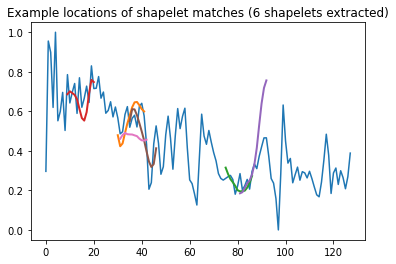

In [78]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title(f"Example locations of shapelet matches ({n_shapelets} shapelets extracted)")

plt.plot(X_train[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [90]:
from sktime.transformations.panel.shapelets import ContractedShapeletTransform

# How long (in minutes) to extract shapelets for.
# This is a simple lower-bound initially;
# once time is up, no further shapelets will be assessed
time_contract_in_mins = 1

# The initial number of shapelet candidates to assess per training series.
# If all series are visited and time remains on the contract then another
# pass of the data will occur
initial_num_shapelets_per_case = 6

# Whether or not to print on-going information about shapelet extraction.
# Useful for demo/debugging
verbose = 1

st = ContractedShapeletTransform(
    time_contract_in_mins=time_contract_in_mins,
    num_candidates_to_sample_per_case=initial_num_shapelets_per_case,
    verbose=verbose,
)
st.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sktime.transformations.panel.shapelets'

In [87]:
!pip install sktime --user

## DATA NORMALIZATION

In [42]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


#scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

## DATA PARTITIONING

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

NameError: name 'X' is not defined

In [ ]:
X_val.shape

# Shaplet Classifiers

In [38]:
from pyts.transformation import ShapeletTransform

# Shapelet transformation
st = ShapeletTransform(window_sizes=[4, 12],
                       random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)
X_test_new = st.transform(X_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_new, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

In [ ]:
n_ts, ts_sz, altro = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

In [ ]:
df10 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], ignore_index=True)
df10['colFromIndex'] = df10.index
df10 = df10.sort_values(by=['indice','colFromIndex'])

In [ ]:
colonna = df10.pop("indice")
df10.insert(0,"indice", colonna)
df10

In [ ]:
df_test1 = pd.read_fwf(r"body_acc_x_train.txt", header=None)
df1

In [ ]:
df10.to_csv("TS_train.csv", index=False)

In [ ]:
dff = pd.read_csv("TS_train.csv")
dff

In [ ]:
dff[dff["indice"] == 0]

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [ ]:
ts = df10.iloc[[0]].drop(columns=["label", "indice", 'colFromIndex'])
df10[0].describe()
ts = ts.T

plt.plot(ts)
plt.plot(ts- ts.mean())

plt.show()

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean

plt.plot(ts)
plt.plot(ts.rolling(window=12).mean())
plt.show()

In [ ]:
ts1 = df1.iloc[[0]].drop(columns=["indice","label"]).T
ts2 = df1.iloc[[1]].drop(columns=["indice","label"]).T

plt.plot(ts1)
plt.plot(ts2)


plt.show()

In [ ]:
dist = dtw(ts1, ts2)
dist

In [ ]:
dist = dtw(ts1[:10], ts2[:10])
dist

In [ ]:
path, dist = dtw_path(ts1[:10], ts2[:10])

In [ ]:
from scipy.spatial.distance import cdist
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [ ]:
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

In [ ]:
acc = subsequence_cost_matrix(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

In [ ]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
features = calculate_features(ts1)

In [ ]:
features

In [12]:
# cnn lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'C:/Users/daddu/OneDrive/Desktop/MAGISTRALE/Data Mining/DM2/UCI HAR Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'C:/Users/daddu/OneDrive/Desktop/MAGISTRALE/Data Mining/DM2/UCI HAR Dataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	verbose, epochs, batch_size = 0, 25, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# reshape data into time steps of sub-sequences
	n_steps, n_length = 4, 32
	trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
	testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
	model.add(TimeDistributed(Dropout(0.5)))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(100))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	print(model.summary())
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
    

# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 30, 64)     1792      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 28, 64)     12352     
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 28, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 14, 64)     0         
 tributed)                                                       
                      

KeyboardInterrupt: 

In [40]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'C:/Users/daddu/OneDrive/Desktop/MAGISTRALE/Data Mining/DM2/UCI HAR Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'C:/Users/daddu/OneDrive/Desktop/MAGISTRALE/Data Mining/DM2/UCI HAR Dataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 15, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	print(model.summary())
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=2):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
    

# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100)               44000     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 6)                 606       
                                                                 
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________
None
>#1: 90.431
Model: "sequential_12"
_________________________________________________________________
 Layer (type)            